In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (StratifiedKFold, GridSearchCV, train_test_split, 
                                   cross_val_score, learning_curve)
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                           roc_auc_score, roc_curve)
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

Dataset loaded successfully!
Dataset shape: (150, 6)
Target distribution:
species
0    50
1    50
2    50
Name: count, dtype: int64
Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Dataset info:
None


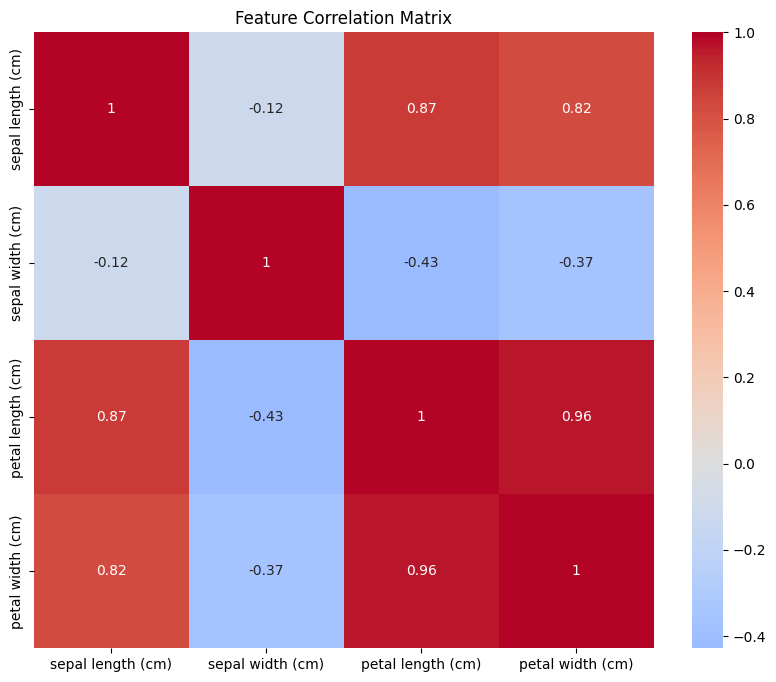

<Figure size 1200x1000 with 0 Axes>

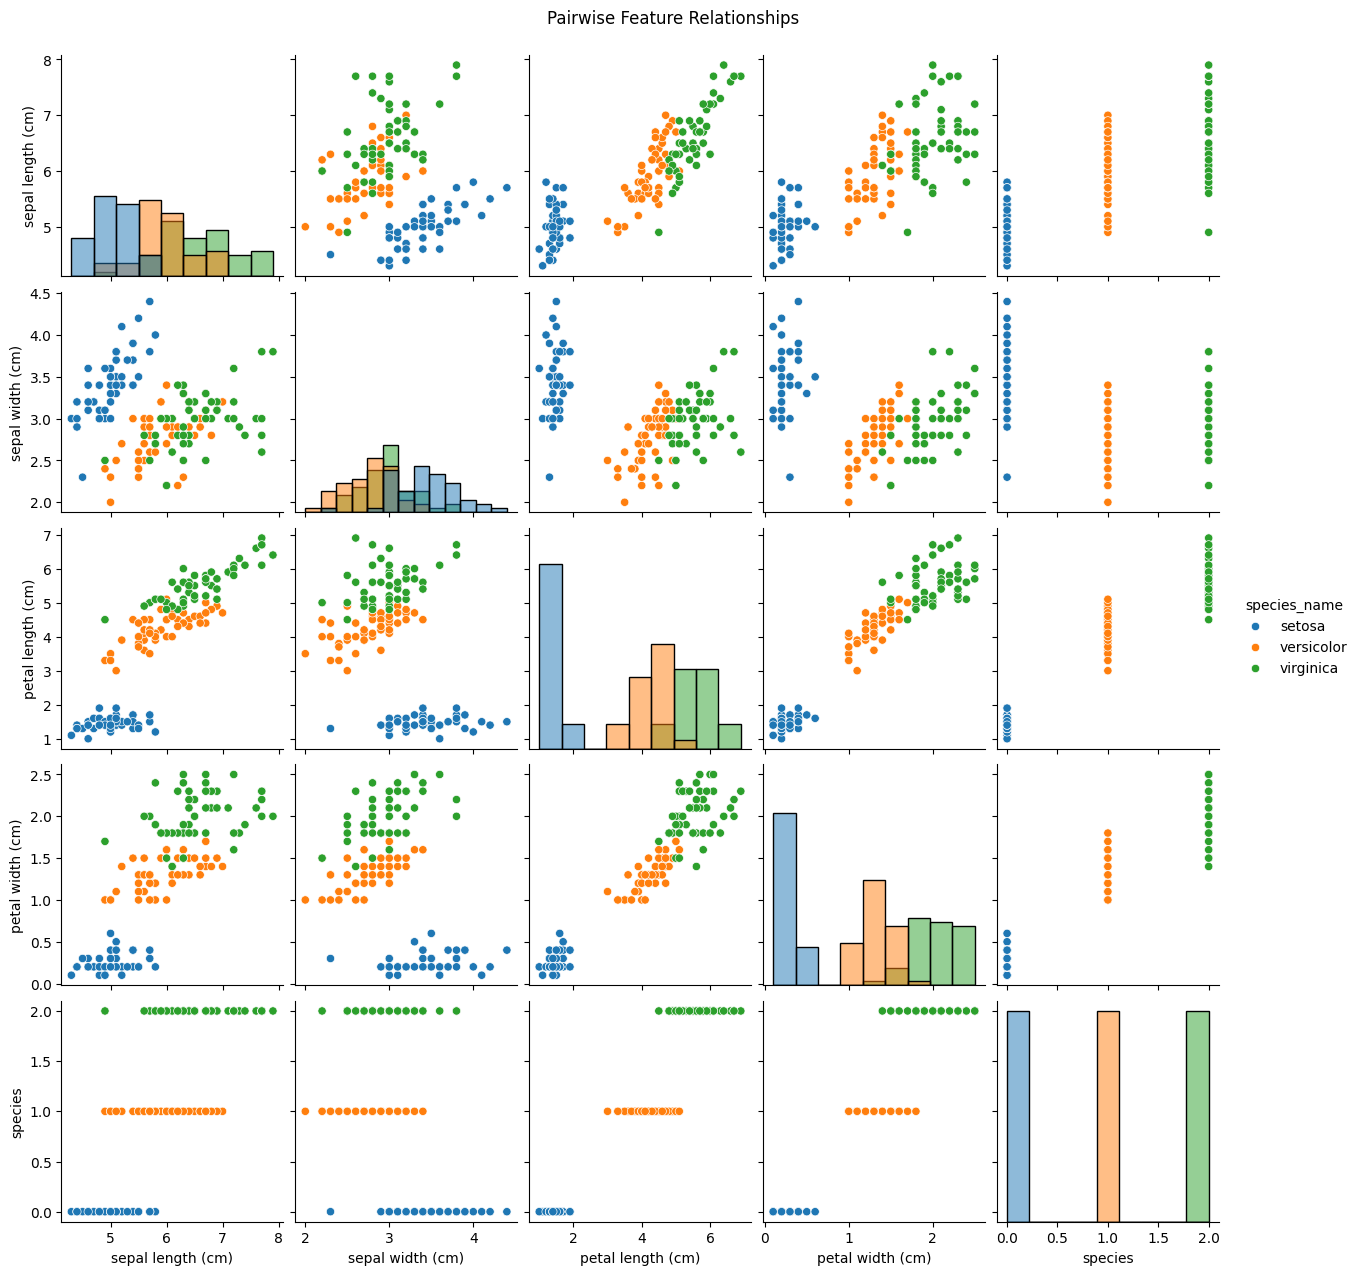


Training set shape: (120, 4)
Test set shape: (30, 4)
Training target distribution:
species
0    40
2    40
1    40
Name: count, dtype: int64
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV score: 0.9583

EVALUATING RANDOM FOREST (DEFAULT)


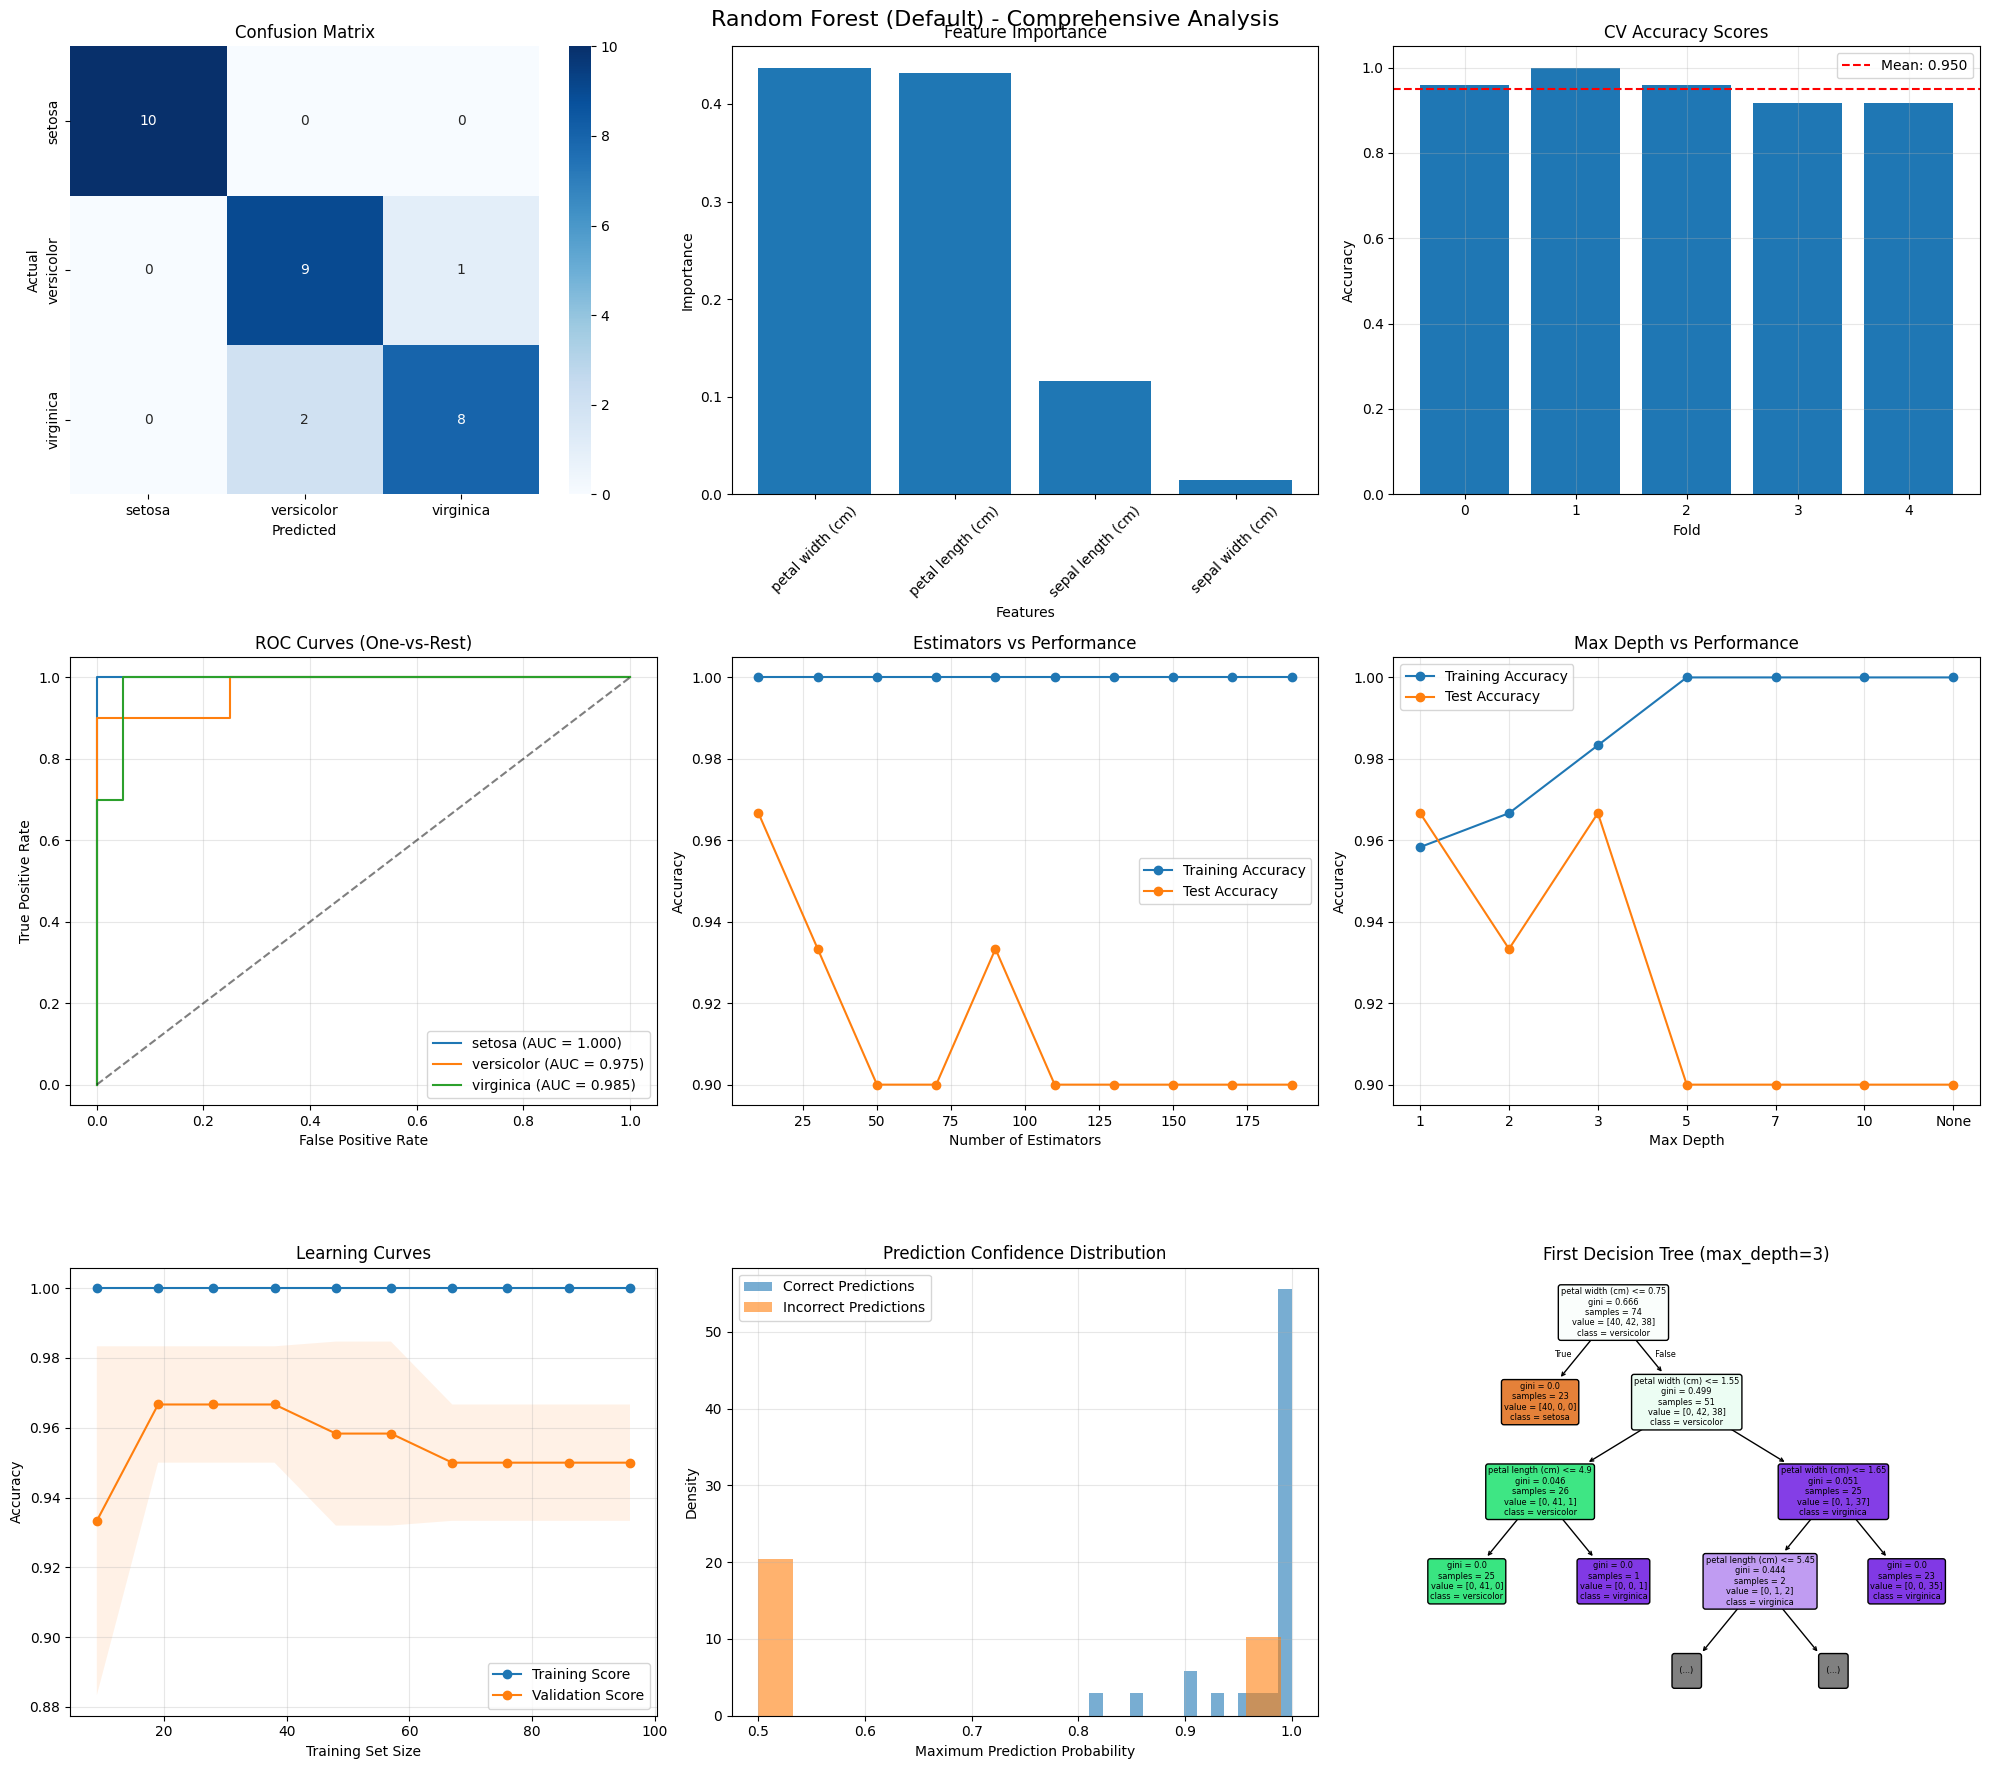

Train Accuracy: 1.0000
Test Accuracy: 0.9000
Macro Avg Precision: 0.9024
Macro Avg Recall: 0.9000
Macro Avg F1-Score: 0.8997
ROC-AUC (OvR): 0.9867
CV Accuracy Mean: 0.9500
CV Accuracy Std: 0.0312

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


EVALUATING RANDOM FOREST (TUNED)


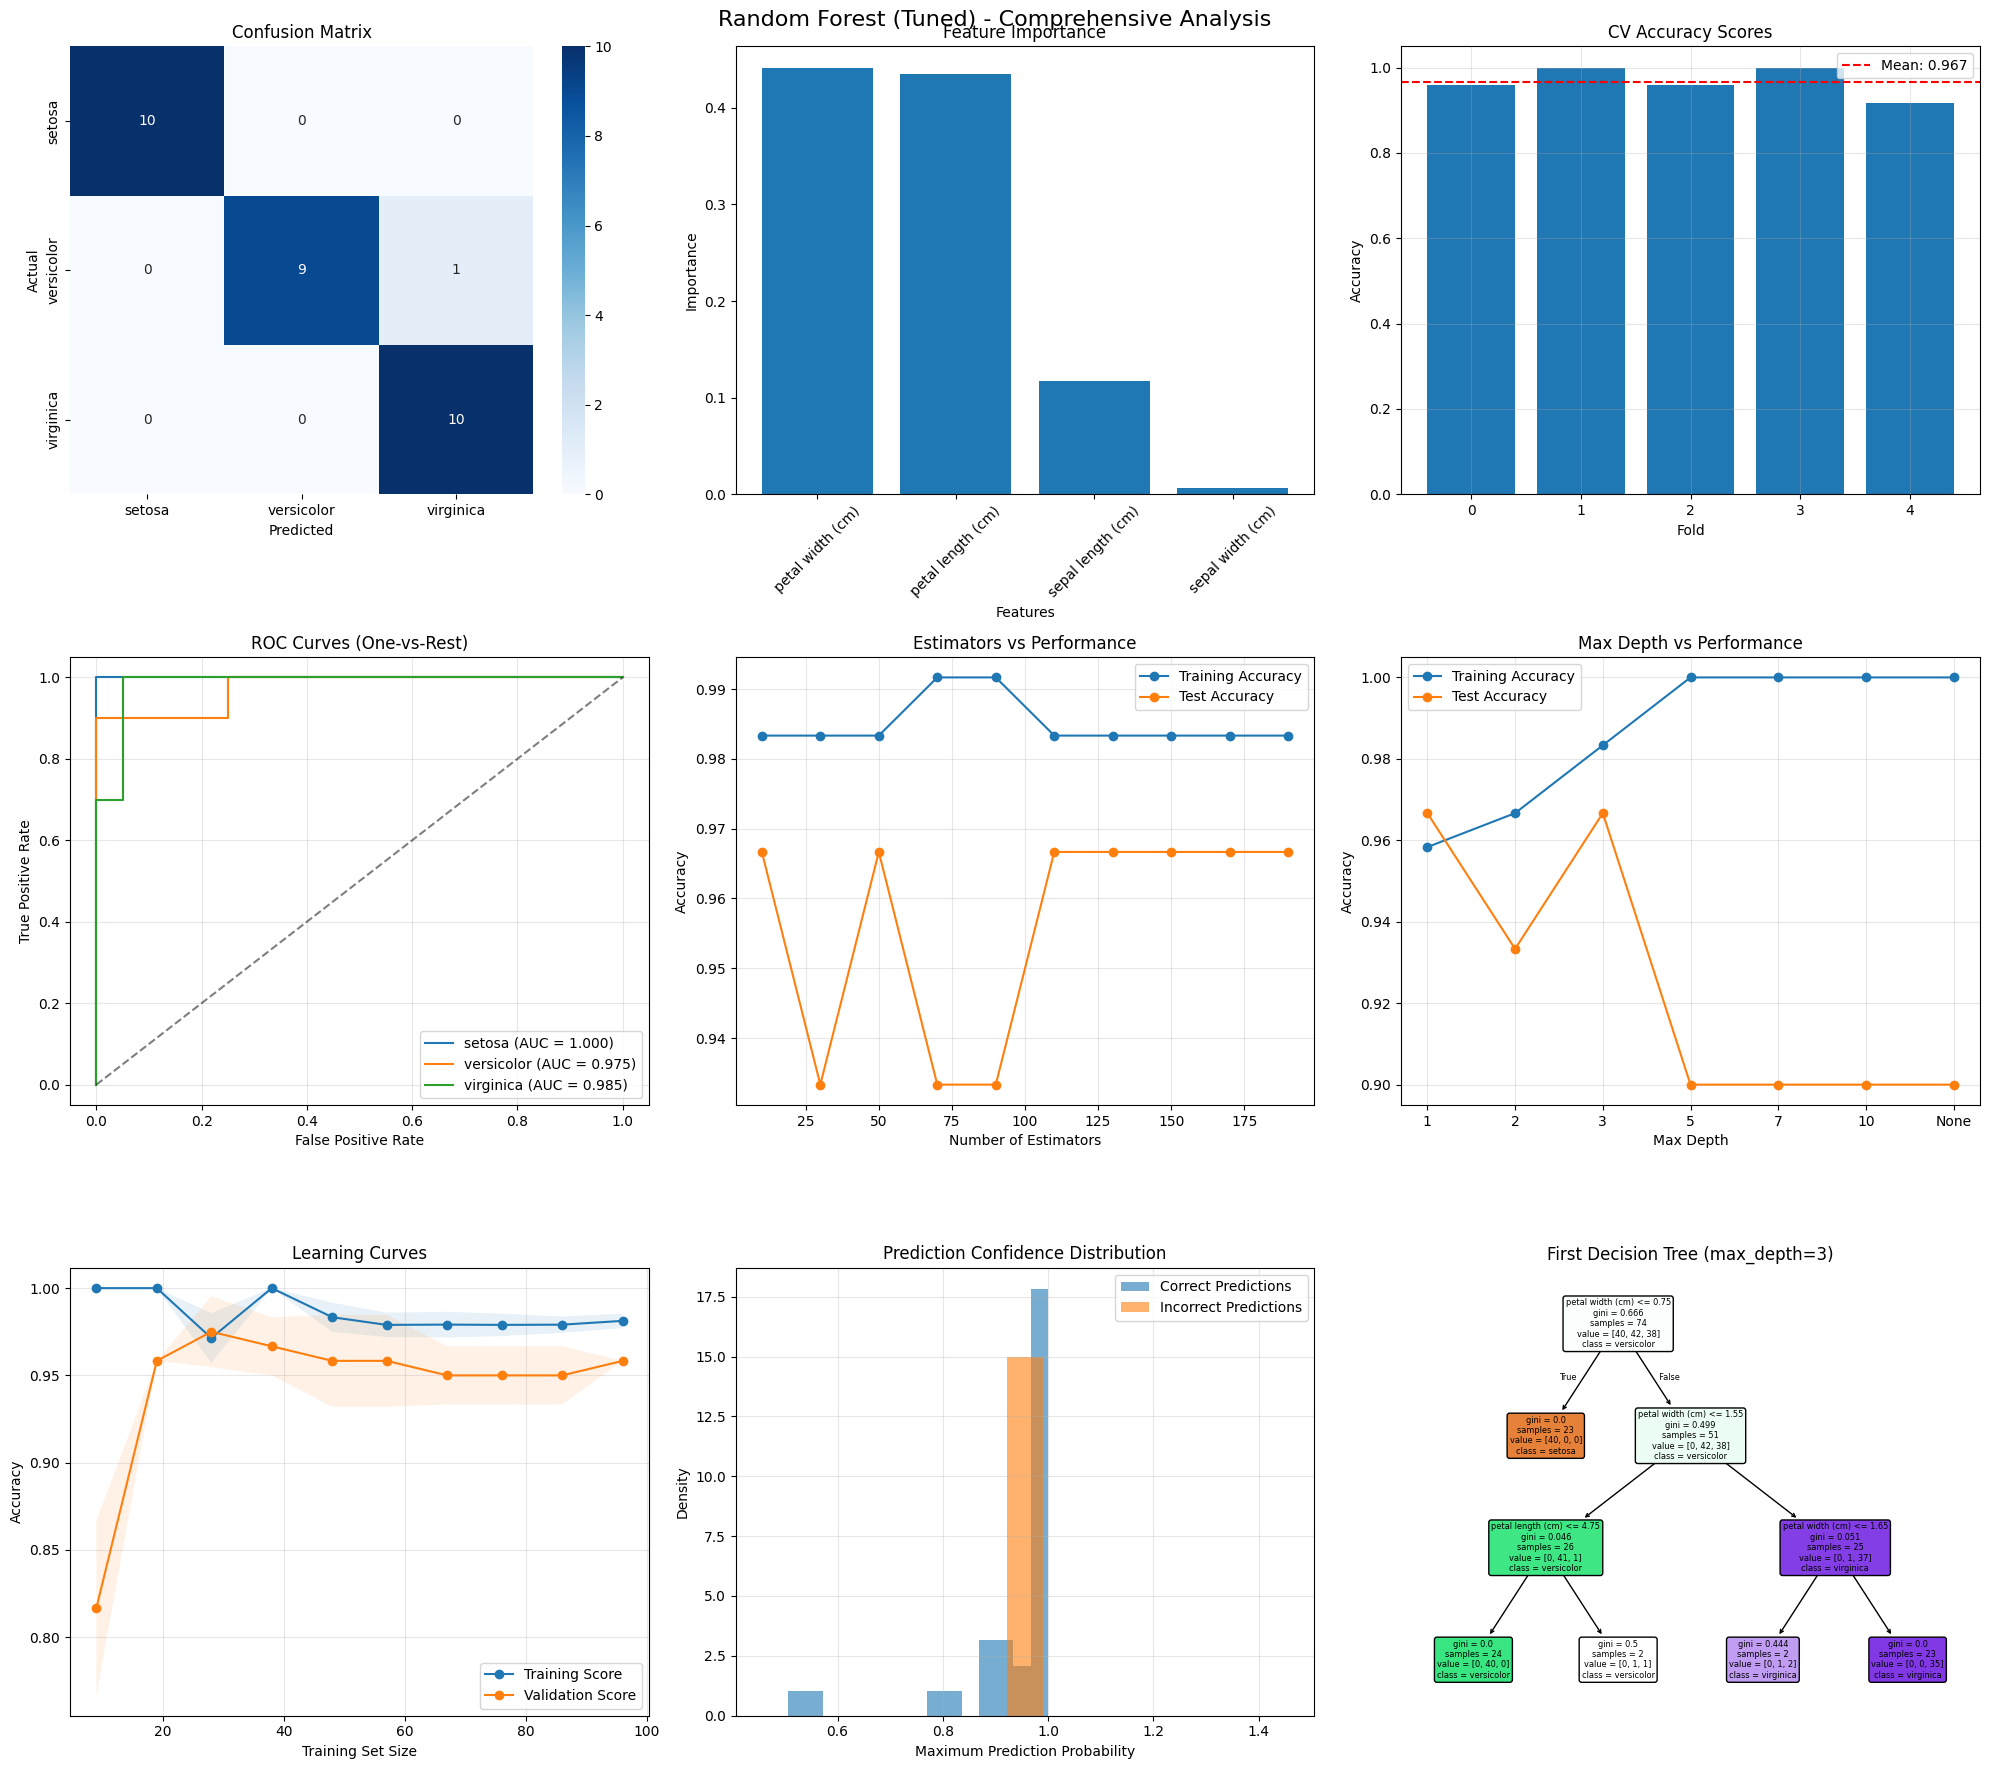

Train Accuracy: 0.9750
Test Accuracy: 0.9667
Macro Avg Precision: 0.9697
Macro Avg Recall: 0.9667
Macro Avg F1-Score: 0.9666
ROC-AUC (OvR): 0.9867
CV Accuracy Mean: 0.9667
CV Accuracy Std: 0.0312

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


EVALUATING RANDOM FOREST (BEST)


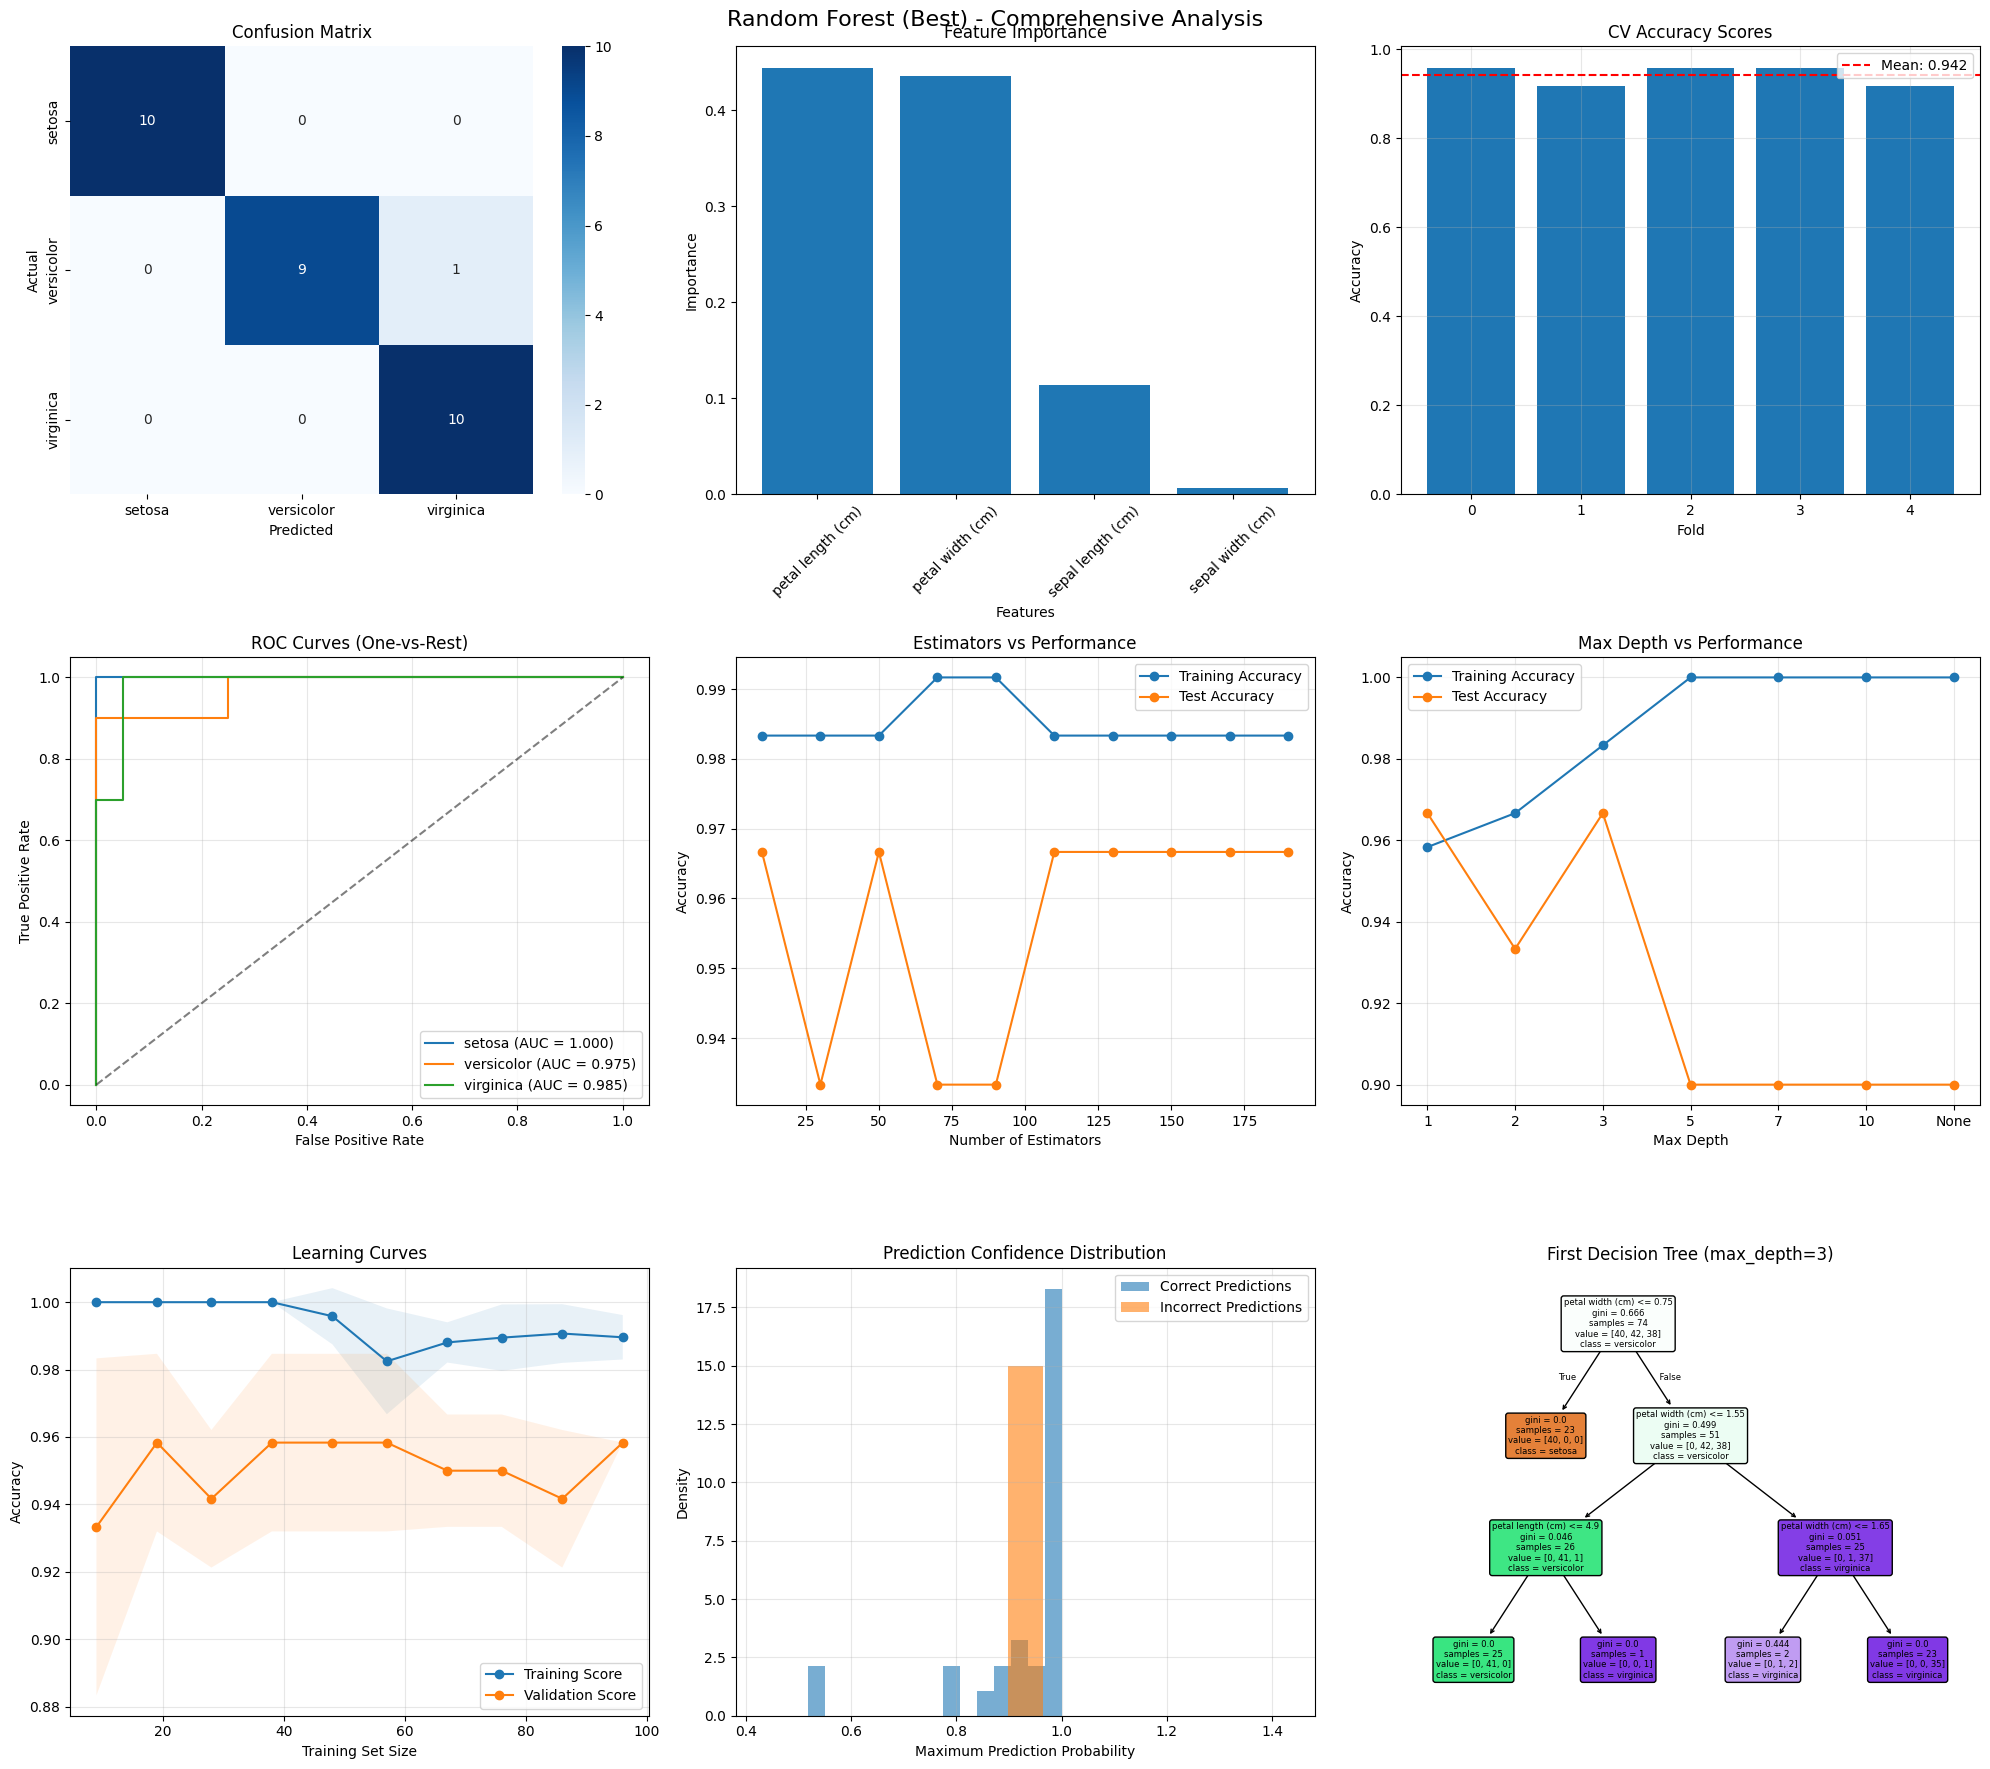

Train Accuracy: 0.9833
Test Accuracy: 0.9667
Macro Avg Precision: 0.9697
Macro Avg Recall: 0.9667
Macro Avg F1-Score: 0.9666
ROC-AUC (OvR): 0.9867
CV Accuracy Mean: 0.9417
CV Accuracy Std: 0.0204

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


RANDOM FOREST MODEL COMPARISON
                         Train Accuracy  Test Accuracy  Macro Avg Precision  \
Random Forest (Default)          1.0000         0.9000               0.9024   
Random Forest (Tuned)            0.9750         0.9667               0.9697   
Random Forest (Best)             0.9833         0.9667               0.9697   

                         Macro Avg Recall

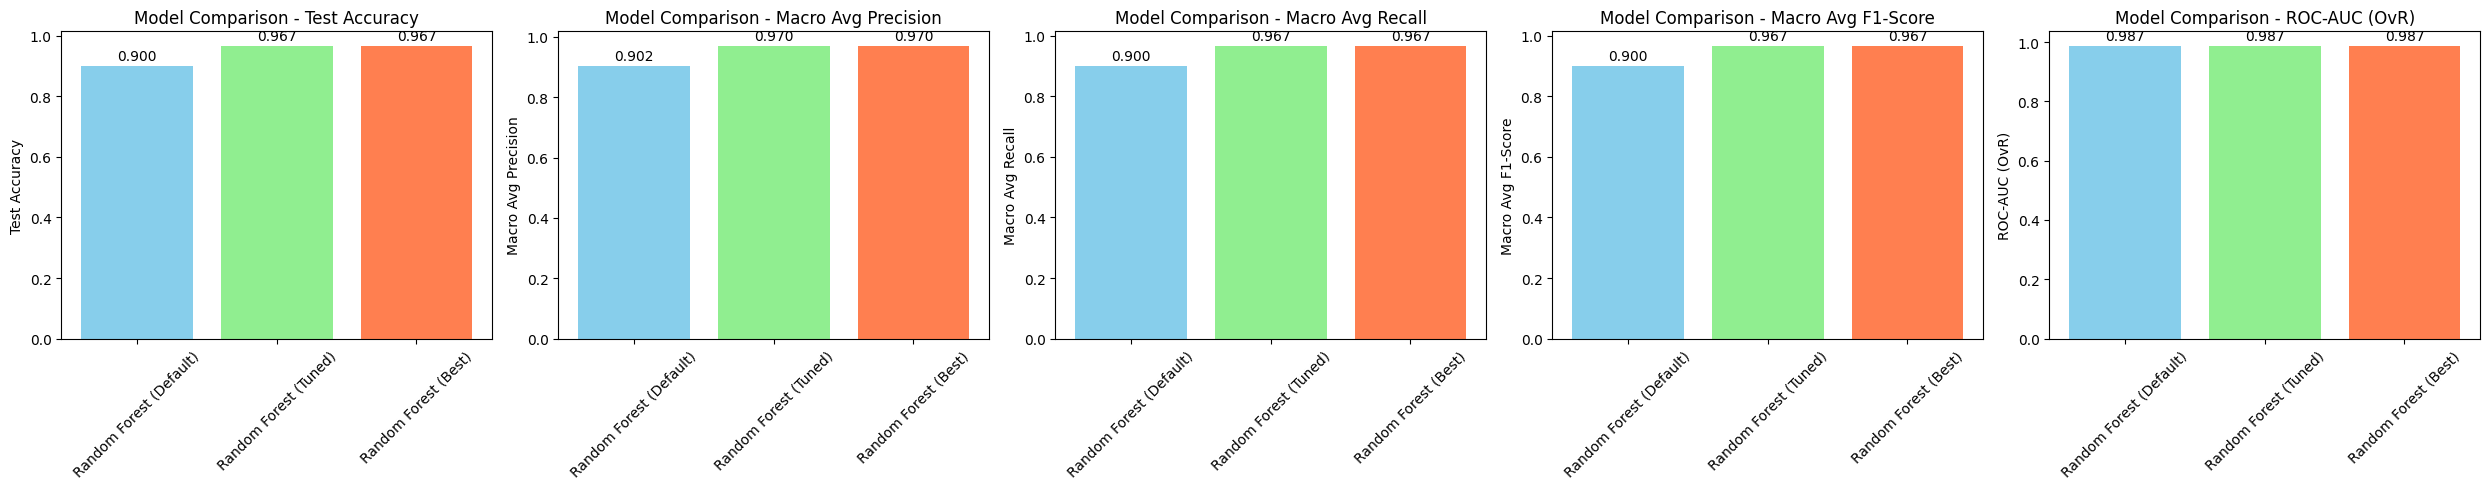

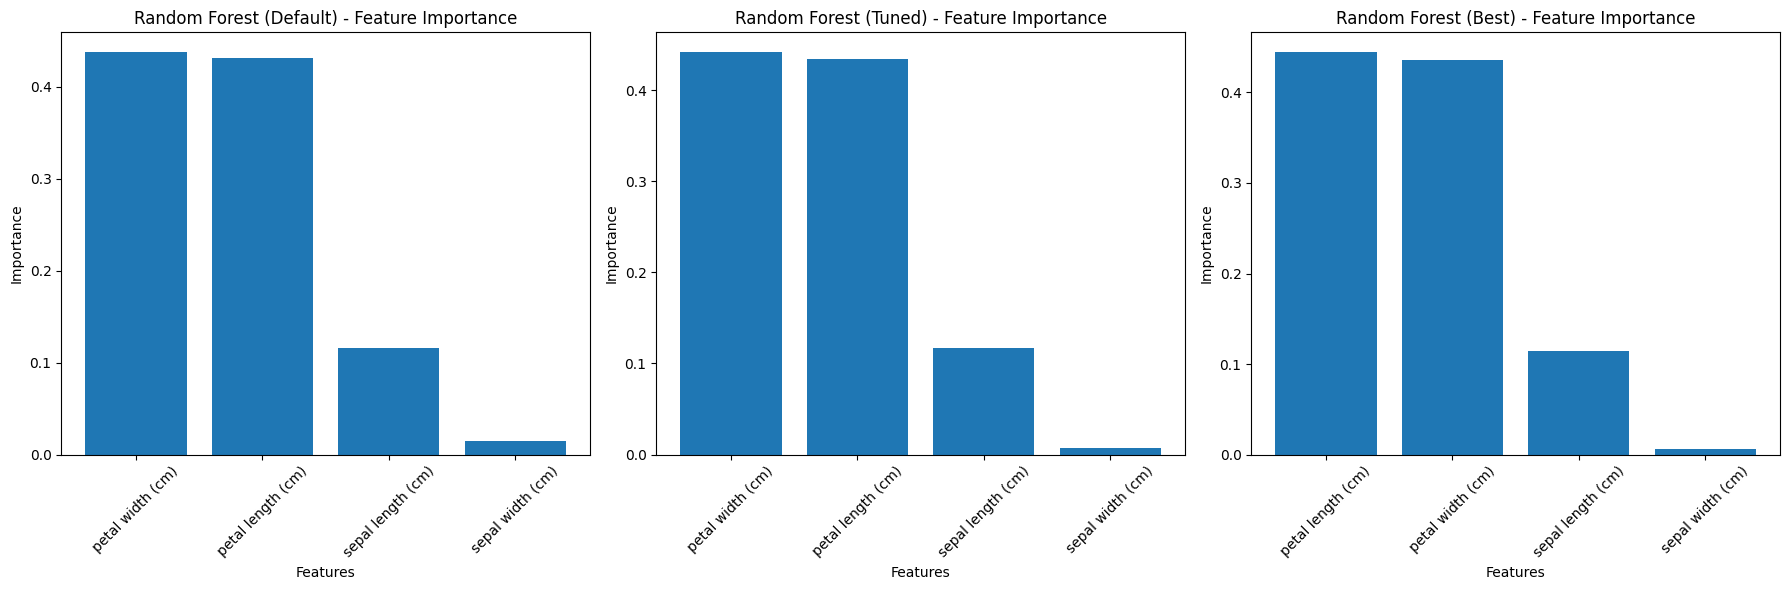

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Target distribution:\n{df['species'].value_counts()}")
print(f"Missing values:\n{df.isnull().sum()}")
print(f"\nDataset info:\n{df.info()}")

plt.figure(figsize=(10, 8))
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()


plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species_name', diag_kind='hist')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()


X = df[iris.feature_names]
y = df['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target distribution:\n{pd.Series(y_train).value_counts()}")


models = {
    'Random Forest (Default)': RandomForestClassifier(random_state=42),
    'Random Forest (Tuned)': RandomForestClassifier(n_estimators=100, max_depth=3, 
                                                   min_samples_split=5, min_samples_leaf=2, 
                                                   random_state=42),
    'Random Forest (Best)': RandomForestClassifier(random_state=42)  # Will be optimized
}



param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, 
                          cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)
models['Random Forest (Best)'] = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

def evaluate_rf_model(model, X_train, X_test, y_train, y_test, cv, model_name):
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    report = classification_report(y_test, y_pred_test, output_dict=True)
    
    try:
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    except:
        roc_auc = 0.0
    
    metrics = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Macro Avg Precision': report['macro avg']['precision'],
        'Macro Avg Recall': report['macro avg']['recall'],
        'Macro Avg F1-Score': report['macro avg']['f1-score'],
        'ROC-AUC (OvR)': roc_auc,
        'CV Accuracy Mean': cv_scores.mean(),
        'CV Accuracy Std': cv_scores.std()
    }
    
    fig, axes = plt.subplots(3, 3, figsize=(20, 18))
    fig.suptitle(f'{model_name} - Comprehensive Analysis', fontsize=16)
    
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    axes[0, 0].set_title('Confusion Matrix')
    axes[0, 0].set_xlabel('Predicted')
    axes[0, 0].set_ylabel('Actual')
    
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]
        axes[0, 1].bar(range(len(importance)), importance[indices])
        axes[0, 1].set_xlabel('Features')
        axes[0, 1].set_ylabel('Importance')
        axes[0, 1].set_title('Feature Importance')
        axes[0, 1].set_xticks(range(len(iris.feature_names)))
        axes[0, 1].set_xticklabels([iris.feature_names[i] for i in indices], rotation=45)
    
    axes[0, 2].bar(range(len(cv_scores)), cv_scores)
    axes[0, 2].axhline(y=cv_scores.mean(), color='r', linestyle='--', 
                      label=f'Mean: {cv_scores.mean():.3f}')
    axes[0, 2].set_xlabel('Fold')
    axes[0, 2].set_ylabel('Accuracy')
    axes[0, 2].set_title('CV Accuracy Scores')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    for i, class_name in enumerate(iris.target_names):
        y_test_binary = (y_test == i).astype(int)
        y_score = y_pred_proba[:, i]
        fpr, tpr, _ = roc_curve(y_test_binary, y_score)
        auc = roc_auc_score(y_test_binary, y_score)
        axes[1, 0].plot(fpr, tpr, label=f'{class_name} (AUC = {auc:.3f})')
    
    axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[1, 0].set_xlabel('False Positive Rate')
    axes[1, 0].set_ylabel('True Positive Rate')
    axes[1, 0].set_title('ROC Curves (One-vs-Rest)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    if hasattr(model, 'n_estimators'):
        estimators_range = range(10, 201, 20)
        train_scores = []
        test_scores = []
        
        for n_est in estimators_range:
            temp_model = RandomForestClassifier(n_estimators=n_est, 
                                              max_depth=model.max_depth,
                                              random_state=42)
            temp_model.fit(X_train, y_train)
            train_scores.append(temp_model.score(X_train, y_train))
            test_scores.append(temp_model.score(X_test, y_test))
        
        axes[1, 1].plot(estimators_range, train_scores, 'o-', label='Training Accuracy')
        axes[1, 1].plot(estimators_range, test_scores, 'o-', label='Test Accuracy')
        axes[1, 1].set_xlabel('Number of Estimators')
        axes[1, 1].set_ylabel('Accuracy')
        axes[1, 1].set_title('Estimators vs Performance')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
    
    depths = [1, 2, 3, 5, 7, 10, None]
    depth_train_scores = []
    depth_test_scores = []
    
    for depth in depths:
        temp_model = RandomForestClassifier(max_depth=depth, n_estimators=50, random_state=42)
        temp_model.fit(X_train, y_train)
        depth_train_scores.append(temp_model.score(X_train, y_train))
        depth_test_scores.append(temp_model.score(X_test, y_test))
    
    depth_labels = [str(d) if d is not None else 'None' for d in depths]
    axes[1, 2].plot(depth_labels, depth_train_scores, 'o-', label='Training Accuracy')
    axes[1, 2].plot(depth_labels, depth_test_scores, 'o-', label='Test Accuracy')
    axes[1, 2].set_xlabel('Max Depth')
    axes[1, 2].set_ylabel('Accuracy')
    axes[1, 2].set_title('Max Depth vs Performance')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    train_sizes, train_scores_lc, test_scores_lc = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
    
    axes[2, 0].plot(train_sizes, np.mean(train_scores_lc, axis=1), 'o-', label='Training Score')
    axes[2, 0].plot(train_sizes, np.mean(test_scores_lc, axis=1), 'o-', label='Validation Score')
    axes[2, 0].fill_between(train_sizes, np.mean(train_scores_lc, axis=1) - np.std(train_scores_lc, axis=1),
                           np.mean(train_scores_lc, axis=1) + np.std(train_scores_lc, axis=1), alpha=0.1)
    axes[2, 0].fill_between(train_sizes, np.mean(test_scores_lc, axis=1) - np.std(test_scores_lc, axis=1),
                           np.mean(test_scores_lc, axis=1) + np.std(test_scores_lc, axis=1), alpha=0.1)
    axes[2, 0].set_xlabel('Training Set Size')
    axes[2, 0].set_ylabel('Accuracy')
    axes[2, 0].set_title('Learning Curves')
    axes[2, 0].legend()
    axes[2, 0].grid(True, alpha=0.3)
    
    max_proba = np.max(y_pred_proba, axis=1)
    correct_predictions = (y_pred_test == y_test)
    
    axes[2, 1].hist(max_proba[correct_predictions], bins=15, alpha=0.6, 
                   label='Correct Predictions', density=True)
    axes[2, 1].hist(max_proba[~correct_predictions], bins=15, alpha=0.6, 
                   label='Incorrect Predictions', density=True)
    axes[2, 1].set_xlabel('Maximum Prediction Probability')
    axes[2, 1].set_ylabel('Density')
    axes[2, 1].set_title('Prediction Confidence Distribution')
    axes[2, 1].legend()
    axes[2, 1].grid(True, alpha=0.3)
    
    if hasattr(model, 'estimators_') and len(model.estimators_) > 0:
        plot_tree(model.estimators_[0], feature_names=iris.feature_names, 
                 class_names=iris.target_names, filled=True, rounded=True, 
                 max_depth=3, ax=axes[2, 2])
        axes[2, 2].set_title('First Decision Tree (max_depth=3)')
    
    plt.tight_layout()
    plt.show()
    
    return metrics

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_results = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"EVALUATING {name.upper()}")
    print('='*60)
    
    metrics = evaluate_rf_model(model, X_train, X_test, y_train, y_test, skf, name)
    rf_results[name] = metrics
    
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    
    print(f"\nDetailed Classification Report:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

comparison_df = pd.DataFrame(rf_results).T
print(f"\n{'='*60}")
print("RANDOM FOREST MODEL COMPARISON")
print('='*60)
print(comparison_df.round(4))

metrics_to_compare = ['Test Accuracy', 'Macro Avg Precision', 'Macro Avg Recall', 
                     'Macro Avg F1-Score', 'ROC-AUC (OvR)']
fig, axes = plt.subplots(1, len(metrics_to_compare), figsize=(25, 5))

for i, metric in enumerate(metrics_to_compare):
    values = [rf_results[name][metric] for name in models.keys()]
    bars = axes[i].bar(models.keys(), values, color=['skyblue', 'lightgreen', 'coral'])
    axes[i].set_title(f'Model Comparison - {metric}')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    

    for j, (bar, v) in enumerate(zip(bars, values)):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, (name, model) in enumerate(models.items()):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]
        axes[i].bar(range(len(importance)), importance[indices])
        axes[i].set_title(f'{name} - Feature Importance')
        axes[i].set_xlabel('Features')
        axes[i].set_ylabel('Importance')
        axes[i].set_xticks(range(len(iris.feature_names)))
        axes[i].set_xticklabels([iris.feature_names[j] for j in indices], rotation=45)

plt.tight_layout()
plt.show()